<a href="https://colab.research.google.com/github/mmartin46/Data_Science_Research/blob/main/MBTIScores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mark 16:16

In [1]:
import pandas as pd
import altair as alt
from altair import Chart, X, Y, Color, Scale
import datetime as dt
import matplotlib.pyplot as plt
from pandas.core.common import random_state
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

In [3]:
import string
punct_exclude=set(string.punctuation)

In [6]:
df = pd.read_csv('/content/mbti_1.csv')
df.dropna(inplace=True)

In [7]:
df['posts']

0       'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1       'I'm finding the lack of me in these posts ver...
2       'Good one  _____   https://www.youtube.com/wat...
3       'Dear INTP,   I enjoyed our conversation the o...
4       'You're fired.|||That's another silly misconce...
                              ...                        
8670    'https://www.youtube.com/watch?v=t8edHB_h908||...
8671    'So...if this thread already exists someplace ...
8672    'So many questions when i do these things.  I ...
8673    'I am very conflicted right now when it comes ...
8674    'It has been too long since I have been on per...
Name: posts, Length: 8675, dtype: object

In [8]:
def char_count(df):
  df['char_count'] = df['posts'].str.len()
char_count(df)
df

,type,posts,char_count
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,4652
1,ENTP,'I'm finding the lack of me in these posts ver...,7053
2,INTP,'Good one _____ https://www.youtube.com/wat...,5265
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",6271
4,ENTJ,'You're fired.|||That's another silly misconce...,6111
...,...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...,5011
8671,ENFP,'So...if this thread already exists someplace ...,7902
8672,INTP,'So many questions when i do these things. I ...,5772
8673,INFP,'I am very conflicted right now when it comes ...,9479


In [9]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
swords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
swords

In [11]:
def stop_word_count(df):
  df['stopwords'] = df['posts'].apply(lambda w : len([w for w in w.split() if w in swords]))
stop_word_count(df)
df

,type,posts,char_count,stopwords
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,4652,221
1,ENTP,'I'm finding the lack of me in these posts ver...,7053,464
2,INTP,'Good one _____ https://www.youtube.com/wat...,5265,309
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",6271,430
4,ENTJ,'You're fired.|||That's another silly misconce...,6111,411
...,...,...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...,5011,332
8671,ENFP,'So...if this thread already exists someplace ...,7902,500
8672,INTP,'So many questions when i do these things. I ...,5772,366
8673,INFP,'I am very conflicted right now when it comes ...,9479,713


In [ ]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [13]:
comp_scores = []
siA = SentimentIntensityAnalyzer()
df_len = int(df.axes[0][-1]) + 1

In [14]:
from textblob import TextBlob

In [15]:
for i in range(0, df_len):
  blob = TextBlob(df['posts'][i])
  sentiment = blob.sentiment.polarity
  comp_scores.append(sentiment)

In [16]:
df['sentiment'] = comp_scores

In [17]:
df

,type,posts,char_count,stopwords,sentiment
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,4652,221,0.145127
1,ENTP,'I'm finding the lack of me in these posts ver...,7053,464,0.163282
2,INTP,'Good one _____ https://www.youtube.com/wat...,5265,309,0.174137
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",6271,430,0.114959
4,ENTJ,'You're fired.|||That's another silly misconce...,6111,411,0.056805
...,...,...,...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...,5011,332,0.134898
8671,ENFP,'So...if this thread already exists someplace ...,7902,500,0.280931
8672,INTP,'So many questions when i do these things. I ...,5772,366,0.105284
8673,INFP,'I am very conflicted right now when it comes ...,9479,713,0.117591


In [18]:
df_list = []
names = list(df.columns)[2:]
for name in names:
  df_list.append((df.groupby(['type'], as_index=False)[name].mean()).sort_values(by=[name]))

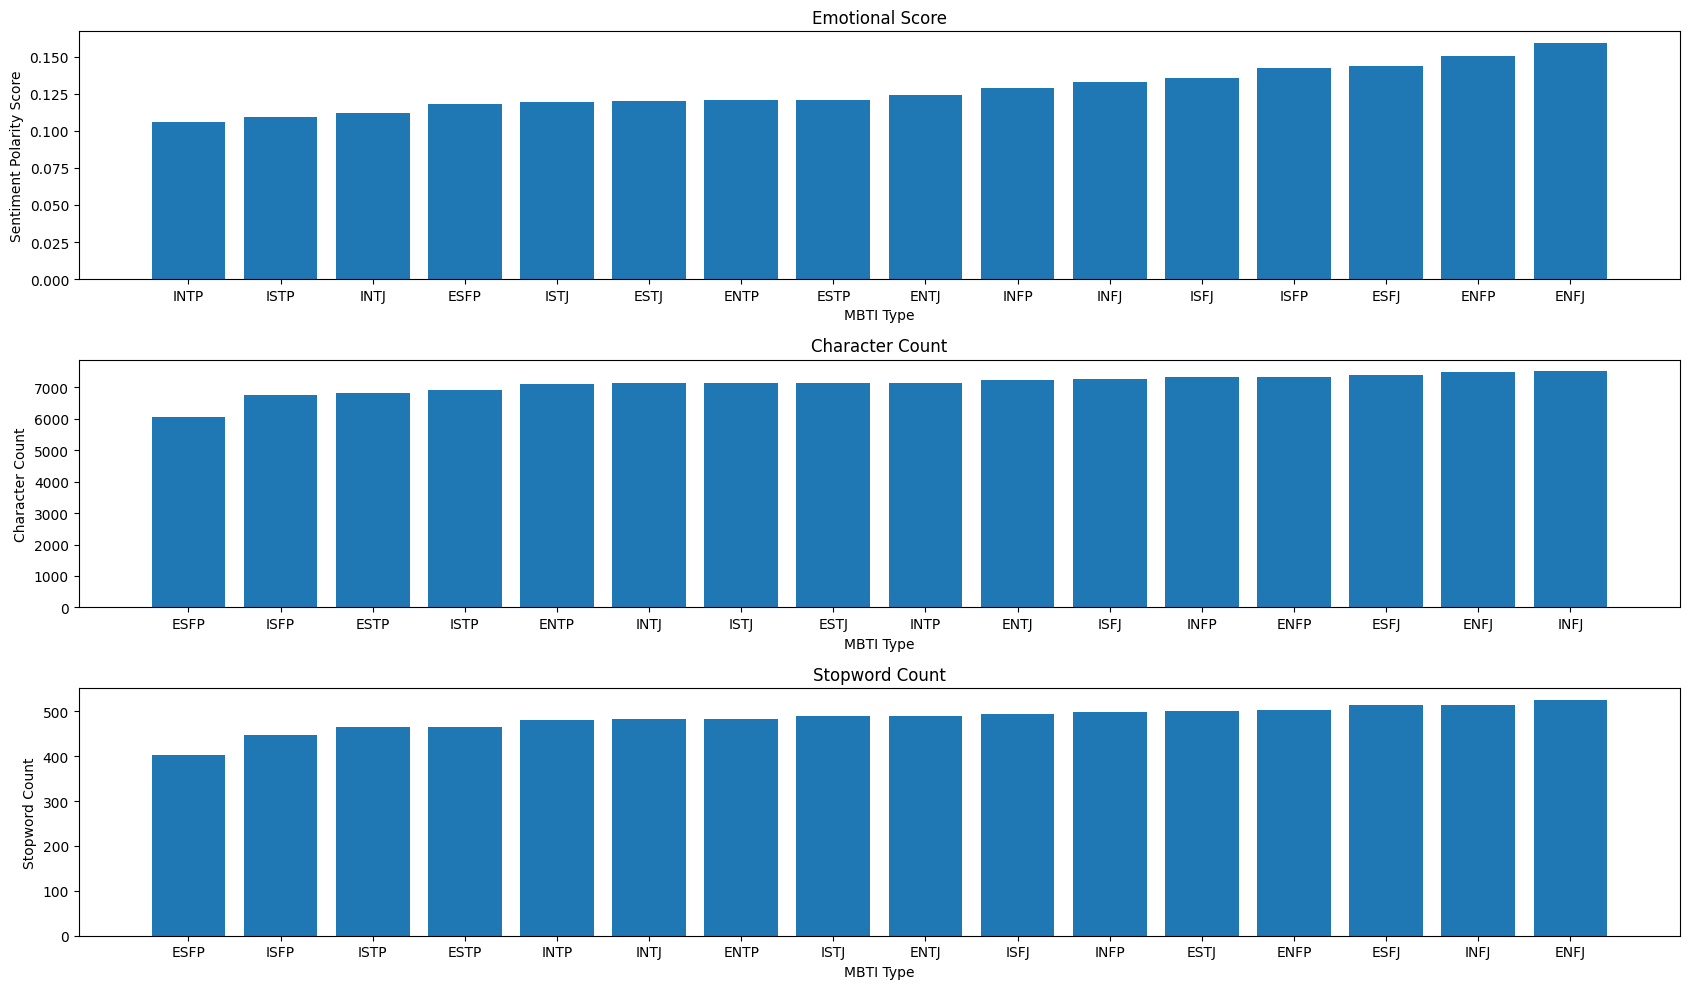

In [19]:
fig, ax = plt.subplots(3, figsize=(17, 10))

ax[0].bar(df_list[2]['type'], df_list[2]['sentiment'])
ax[0].set(
    xlabel='MBTI Type',
    ylabel='Sentiment Polarity Score',
    title='Emotional Score'
)

ax[1].bar(df_list[0]['type'], df_list[0]['char_count'])
ax[1].set(
    xlabel='MBTI Type',
    ylabel='Character Count',
    title='Character Count'
)
ax[2].bar(df_list[1]['type'], df_list[1]['stopwords'])
ax[2].set(
    xlabel='MBTI Type',
    ylabel='Stopword Count',
    title='Stopword Count'
)
fig.tight_layout()

In [20]:
stopwords = stopwords.words('english')

In [21]:
noStopWordPosts = df['posts'].apply(lambda words : ' '.join(word.lower() for word in words.split() if word not in stopwords))

In [22]:
df['posts'] = noStopWordPosts

In [23]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [24]:
df

,type,posts,char_count,stopwords,sentiment
0,INFJ,'http://www.youtube.com/watch?v=qsxhcwe3krw|||...,4652,221,0.145127
1,ENTP,'i'm finding lack posts alarming.|||sex boring...,7053,464,0.163282
2,INTP,'good one _____ https://www.youtube.com/watch?...,5265,309,0.174137
3,INTJ,"'dear intp, i enjoyed conversation day. esoter...",6271,430,0.114959
4,ENTJ,'you're fired.|||that's another silly misconce...,6111,411,0.056805
...,...,...,...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edhb_h908||...,5011,332,0.134898
8671,ENFP,'so...if thread already exists someplace else ...,7902,500,0.280931
8672,INTP,'so many questions things. i would take purple...,5772,366,0.105284
8673,INFP,'i conflicted right comes wanting children. i ...,9479,713,0.117591


In [25]:
from PIL import Image
import numpy as np
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [26]:
text = str(df['posts']).replace('  ', ' ')
wordcloud = WordCloud(background_color='white').generate(text)

In [ ]:
person_mask = np.array(Image.open('/content/manpng.parspng.com-2.png'))
person_mask

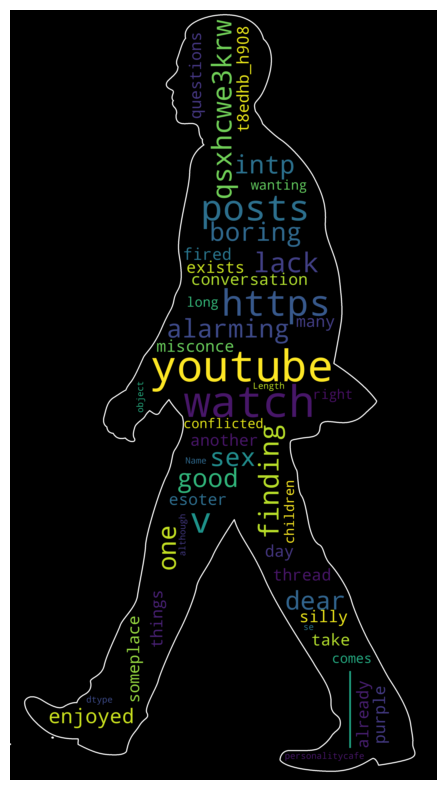

In [28]:
wc = WordCloud(
    background_color="black",
    mask=person_mask,
    max_words=1000,
    contour_width=10,
    contour_color='white'
)

wc.generate(text)
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [29]:
df['posts'] = df['posts'].str.replace('[^\w\s]','') # Removes punctuation
df['posts'] = df['posts'].str.replace('\b\d+\b', '') # Removes digits

<ipython-input-29-0fd83b73eaaf>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['posts'] = df['posts'].str.replace('[^\w\s]','') # Removes punctuation
<ipython-input-29-0fd83b73eaaf>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['posts'] = df['posts'].str.replace('\b\d+\b', '') # Removes digits


In [30]:
degrees = ['engineer', 'biology',
          'math']

def_xlabel = 'MBTI Type'
ylabels = ['Engineer Statistics', 'Biology Statistics',
           'Mathematical Statistics']

titles = ['Engineering Students', 'Biology Students',
          'Mathematical Students']


In [31]:

allstats = []

for degree in degrees:
  tmp = df[df['posts'].str.contains(degree)]
  tmp = tmp.groupby(['type'], as_index=False).count()
  allstats.append(tmp)

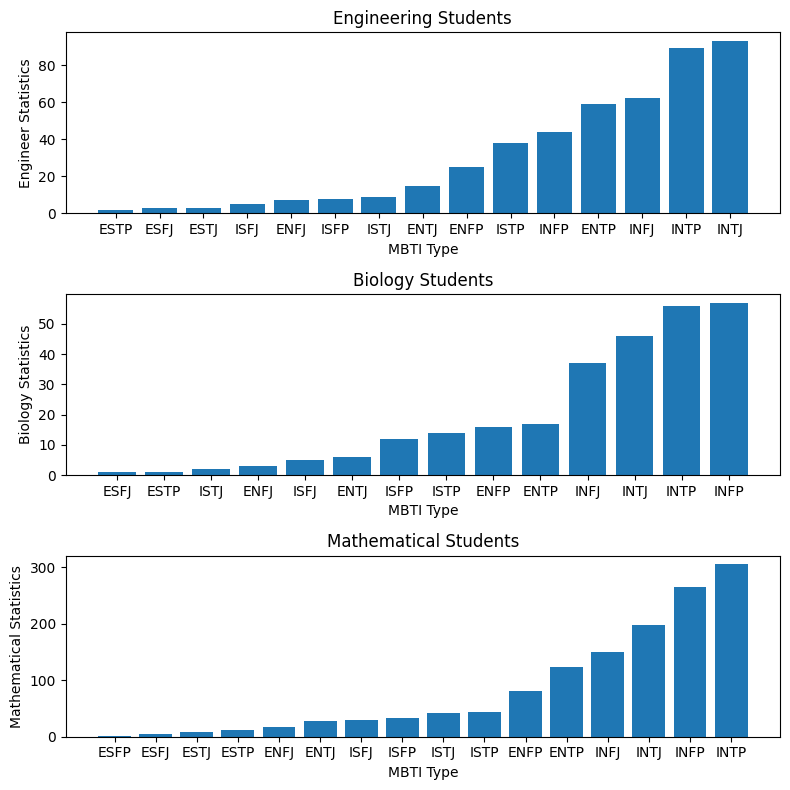

In [32]:

fig, ax = plt.subplots(3, figsize=(8, 8))
for i in range(0, 3):
  allstats[i].sort_values(by=['posts'], inplace=True)
  ax[i].bar(allstats[i]['type'], allstats[i]['posts'])
  ax[i].set(
      xlabel=def_xlabel,
      ylabel=ylabels[i],
      title=titles[i]
  )
plt.tight_layout()

In [33]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [34]:
df_copy = df.copy()
df_copy['tokens'] = df_copy['posts'].apply(lambda row : word_tokenize(row))

In [35]:
df_copy

,type,posts,char_count,stopwords,sentiment,tokens
0,INFJ,httpwwwyoutubecomwatchvqsxhcwe3krwhttp41mediat...,4652,221,0.145127,[httpwwwyoutubecomwatchvqsxhcwe3krwhttp41media...
1,ENTP,im finding lack posts alarmingsex boring posit...,7053,464,0.163282,"[im, finding, lack, posts, alarmingsex, boring..."
2,INTP,good one _____ httpswwwyoutubecomwatchvfhigbol...,5265,309,0.174137,"[good, one, _____, httpswwwyoutubecomwatchvfhi..."
3,INTJ,dear intp i enjoyed conversation day esoteric ...,6271,430,0.114959,"[dear, intp, i, enjoyed, conversation, day, es..."
4,ENTJ,youre firedthats another silly misconception t...,6111,411,0.056805,"[youre, firedthats, another, silly, misconcept..."
...,...,...,...,...,...,...
8670,ISFP,httpswwwyoutubecomwatchvt8edhb_h908ixfp i alwa...,5011,332,0.134898,"[httpswwwyoutubecomwatchvt8edhb_h908ixfp, i, a..."
8671,ENFP,soif thread already exists someplace else whic...,7902,500,0.280931,"[soif, thread, already, exists, someplace, els..."
8672,INTP,so many questions things i would take purple p...,5772,366,0.105284,"[so, many, questions, things, i, would, take, ..."
8673,INFP,i conflicted right comes wanting children i ho...,9479,713,0.117591,"[i, conflicted, right, comes, wanting, childre..."


In [80]:
def df_of_words(word):
  # Generates a dataframe based on the count of the use
  # of a synyonym of a specific word.
  synonyms = []
  for syn in wordnet.synsets(word):
    for lm in syn.lemmas():
        synonyms.append(lm.name().replace('_', ' '))
  synon = '|'.join(synonyms)

  d = df[df['posts'].str.contains(synon)].groupby('type').count()
  return d.iloc[:, :1].reset_index().sort_values(by=['posts'])


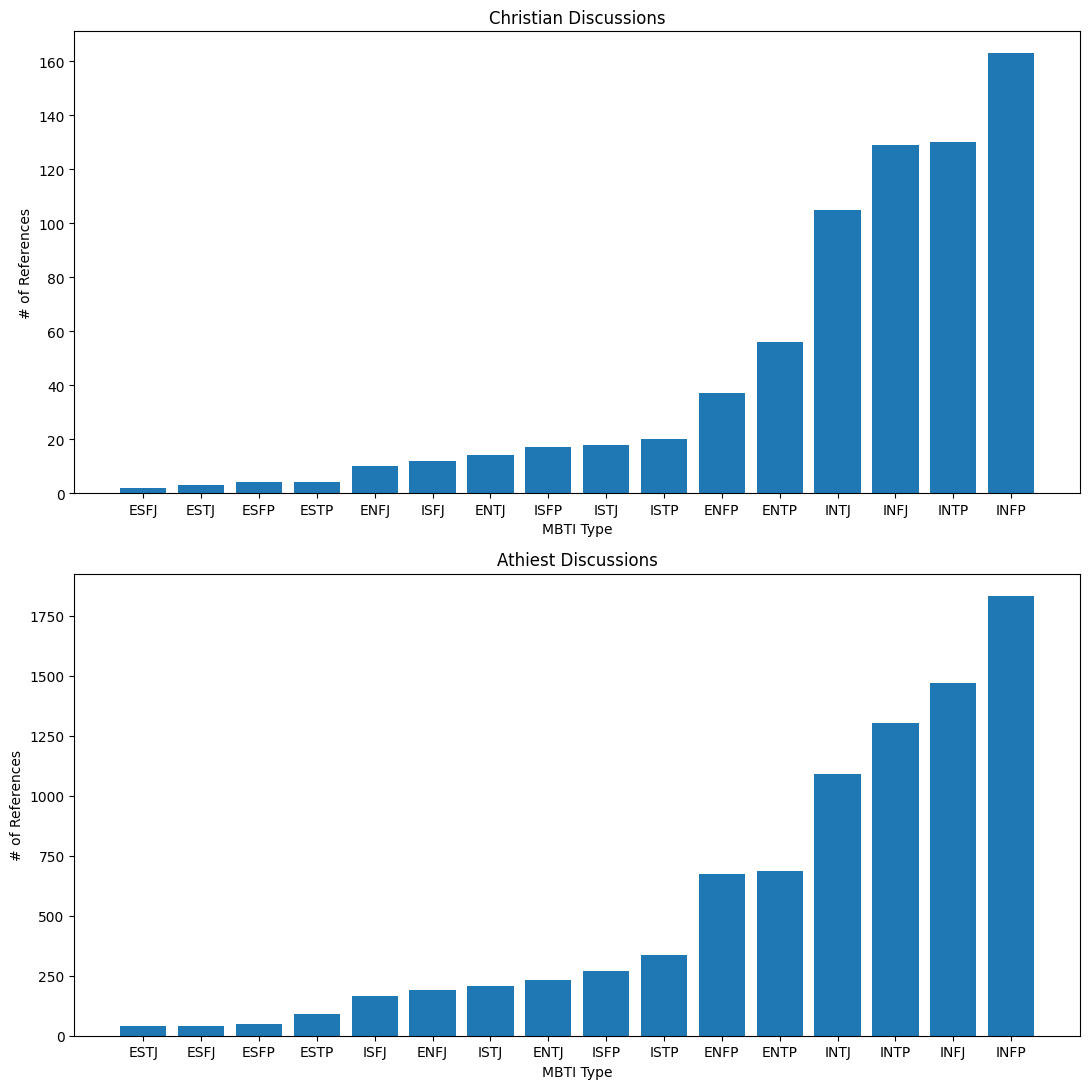

In [81]:
topics = {
    'Christian Discussions' : [df_of_words('christian'), 'Christian Discussions'],
    'Athiest Discussions' : [df_of_words('athiest'), 'Athiest Discussions'],
}

fig, ax = plt.subplots(len(topics), figsize=(11, 11))

i = 0
for key, value in topics.items():
  ax[i].bar(value[0]['type'], value[0]['posts'])
  ax[i].set(
      xlabel='MBTI Type',
      ylabel='# of References',
      title=value[1]
  )
  i += 1

plt.tight_layout()